In [119]:
import pandas as pd
import numpy as np
import math  
import cv2 

In [120]:
img = cv2.imread(r"C:\Users\mt19237\Desktop\Untitled Folder\ASS_5\2d_image_2.jpg")
img.shape


(161, 172, 3)

In [129]:
arr_x=[]
arr_y=[]
arr_z=[]
for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
        arr_x.append(int(img[i][j][0]))
        arr_y.append(int(img[i][j][1]))
        arr_z.append(int(img[i][j][2]))
length=len(arr_z)

In [130]:
k=5
c_x=[]
c_y=[]
c_z=[]
dist_c=[]
for i in range(0,k):
    c_x.append(arr_x[i])
    c_y.append(arr_y[i])
    c_z.append(arr_z[i])
    dist_c.append(0)
c_x,c_y,c_z,dist_c

([224, 225, 234, 237, 217],
 [219, 226, 245, 251, 226],
 [255, 254, 243, 239, 230],
 [0, 0, 0, 0, 0])

In [124]:
clust=[]
temp=0
for i in range(0,length):
    for j in range(0,k):
        dist_c[j]=math.sqrt((c_x[j]-int(arr_x[i]))**2+(c_y[j]-int(arr_y[i]))**2+(c_z[j]-int(arr_z[i]))**2)
    temp=min(dist_c)
    for j in range(0,k):
        if(temp==dist_c[j]):
            clust.append(j)
            break

In [125]:
print(len(clust),length)

27692 27692


In [126]:

def cal_median(clust):
    c_x_n=[]
    c_y_n=[]
    c_z_n=[]
    for j in range(0,k):
        mean_x=0
        mean_y=0
        mean_z=0
        count=0
        for i in range(0,len(clust)):
            if(clust[i]==j):
                mean_x=mean_x+int(arr_x[i])
                mean_y=mean_y+int(arr_y[i])
                mean_z=mean_z+int(arr_z[i])
                count=count+1
        print('cluster:',count)
        mean_x=mean_x/count
        mean_y=mean_y/count
        mean_z=mean_z/count
        c_x_n.append(mean_x)
        c_y_n.append(mean_y)
        c_z_n.append(mean_z)
    return c_x_n,c_y_n,c_z_n

#print(c_x_n,c_y_n,c_z_n)


In [127]:
def update_cluster(clust,c_x_n,c_y_n,c_z_n):
    for i in range(0,length):
        for j in range(0,k):
            dist_c[j]=math.sqrt((c_x[j]-int(arr_x[i]))**2+(c_y[j]-int(arr_y[i]))**2+(c_z[j]-int(arr_z[i]))**2)
        #print(dist_c,min(dist_c))
        temp=min(dist_c)
        for j in range(0,k):
            if(temp==dist_c[j]):
                clust.append(j)
                break
    return clust

In [128]:
old_clust=clust
new_clust=[]
k1=0
while old_clust!=new_clust:
    c_x_n,c_y_n,c_z_n=cal_median(clust)
    #print(clust)
    old_clust=clust
    clust=[]
    clust=update_cluster(clust,c_x_n,c_y_n,c_z_n)
    new_clust=clust
    print('loop:',k1)
    k1=k1+1

cluster: 2803
cluster: 587
cluster: 1329
cluster: 209
cluster: 22764
loop: 0


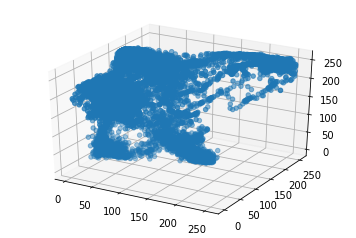

In [153]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')

zline = np.linspace(0, 255)
xline = np.linspace(0, 255)
yline = np.linspace(0, 255)


xdata = arr_x
ydata = arr_y
zdata = arr_z
ax.scatter(xdata, ydata, zdata)
